# Model Selection Part 1/3 - First training exploration

*Exploratory work on first training data with 300 most frequent ingredients. Predict $G_2$ (38 labels).*

### Short description

First model training with actual dataset

    - Dataset : 165K products, 300 features, 1 label to predict (G2 with 38 labels)
    - Note that classes are highly imbalanced. 
    - We stratify the train/test split on G2 and use balanced class weights parameters when possible.
    - Models tried : 
        - Tree based methods (Decision Tree, Random Forest)
    - Frameworks : Ensembles, One-vs-rest 

**Result & One line Conclusion:** 

* ** No model saved -> We need to work more on features before continue. **

In [13]:
import pandas as pd
import numpy as np 
import time 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.lib.deepreload import reload as dreload
pd.set_option("display.max_columns", 200, "display.max_rows", 200)
%load_ext autoreload
%autoreload 2
%matplotlib inline
df = pd.read_csv(r'C:\Users\Antoine\Coding Bootcamp\Open Food Facts\data_for_training.csv', low_memory=False)

## Final Preprocessing Steps

In [74]:
df['pnns_groups_2'] = df['pnns_groups_2'].astype('category')

C:\Users\Antoine\anaconda3\envs\off_ai_emlyon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
raw_target = df['pnns_groups_2']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
target = le.transform(raw_target)

In [135]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
#df = pd.read_csv(path)
features = df.drop(columns=['target'])
target = df['target']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0, stratify=target)

In [117]:
x_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = pd.Series(y_train).sample(frac=0.3, random_state=42).to_numpy()

In [136]:
y_train = y_train.reshape(-1, 1)
y_sample = y_sample.reshape(-1, 1)

In [124]:
X_train.shape

(132900, 300)

## Random Forest

In [133]:
rf = RandomForestClassifier(
    n_estimators = 400,
    class_weight = 'balanced_subsample',
    criterion = 'gini',
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'sqrt',
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
rf.fit(X_train, y_train)
y_preds_train = rf.predict(X_train)
y_preds_test = rf.predict(X_test)
classifier_metrics(y_test=y_train, y_preds=y_preds_train, average='macro', model='Train Set - Random forest')
classifier_metrics(y_test=y_test, y_preds=y_preds_test, average='macro', model='Test Set - Random forest')

Train Set - Random forest Classification Metrics :
-------------------
Accuracy : 74.57%
Recall : 72.47%
Precision : 86.91%
F1-score : 75.23%


Test Set - Random forest Classification Metrics :
-------------------
Accuracy : 53.43%
Recall : 47.50%
Precision : 59.72%
F1-score : 49.88%




Text(0.5,1,'Precision by category')

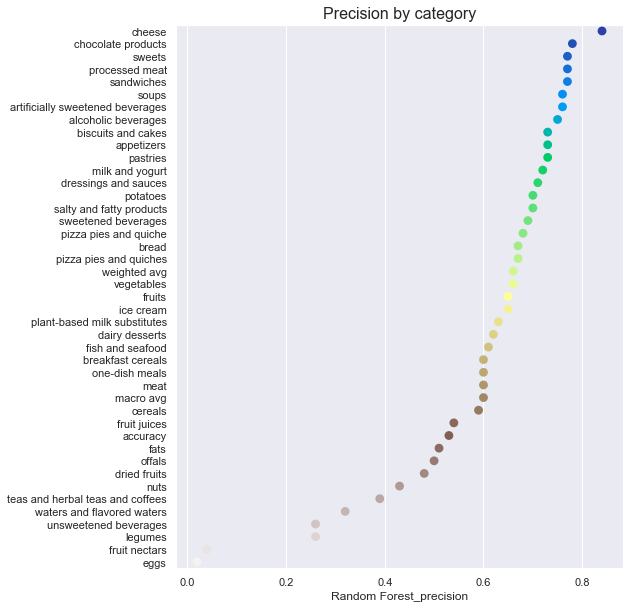

In [153]:
yt1 = le.inverse_transform(pd.Series(y_test))
yp1 = le.inverse_transform(pd.Series(y_preds_test.reshape(-1,)).astype(int))
report = get_classification_report(yt1, yp1, model='Random Forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['Random Forest_precision'], palette='terrain', hue)
plt.title('Precision by category', fontsize=16)

In [132]:
from sklearn.multiclass import OneVsRestClassifier
rf = RandomForestClassifier(
    n_estimators = 100,
    class_weight = None,
    criterion = 'gini',
    max_depth = 30, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'sqrt', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = 1, 
    verbose = 0, 
)
ovc = OneVsRestClassifier(estimator=rf, n_jobs=1)
ovc.fit(X_train, y_train)
y_preds_train = ovc.predict(X_train)
y_preds_test = ovc.predict(X_test)
classifier_metrics(y_test=y_train, y_preds=y_preds_train, average='macro', model='Train Set - Random forests chain on sample')
classifier_metrics(y_test=y_test, y_preds=y_preds_test, average='macro', model='Test Set - Random forests chain on sample')

Train Set - Random forests chain on sample Classification Metrics :
-------------------
Accuracy : 68.12%
Recall : 62.07%
Precision : 85.68%
F1-score : 68.39%


Test Set - Random forests chain on sample Classification Metrics :
-------------------
Accuracy : 55.68%
Recall : 44.37%
Precision : 67.30%
F1-score : 49.58%




In [160]:
rf = RandomForestClassifier(
    n_estimators = 50,
    class_weight = None,
    criterion = 'gini',
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = 1, 
    verbose = 0, 
)
ovc = OneVsRestClassifier(estimator=rf, n_jobs=1)
ovc.fit(X_train, y_train)
y_preds_train = ovc.predict(X_train)
y_preds_test = ovc.predict(X_test)
classifier_metrics(y_test=y_train, y_preds=y_preds_train, average='macro', model='Train Set - Random forests chain on sample')
classifier_metrics(y_test=y_test, y_preds=y_preds_test, average='macro', model='Test Set - Random forests chain on sample')

Train Set - Random forests chain on sample Classification Metrics :
-------------------
Accuracy : 77.25%
Recall : 70.68%
Precision : 91.87%
F1-score : 76.49%


Test Set - Random forests chain on sample Classification Metrics :
-------------------
Accuracy : 57.15%
Recall : 45.99%
Precision : 64.93%
F1-score : 50.81%




Text(0.5,1,'Precision by category')

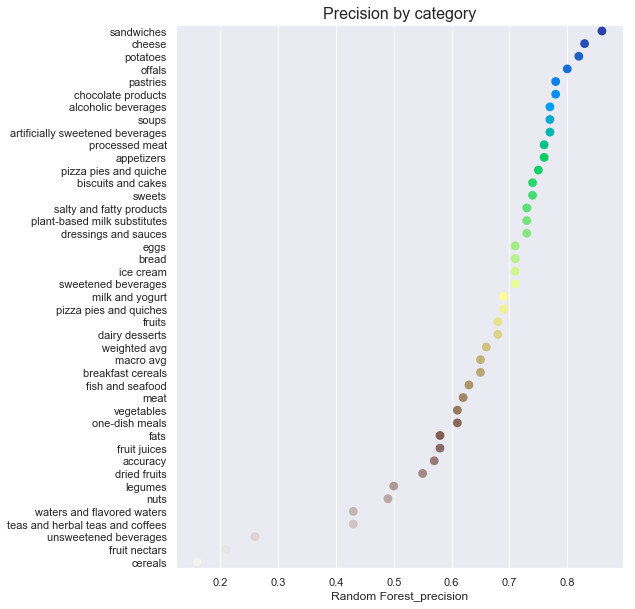

In [163]:
yt1 = le.inverse_transform(pd.Series(y_test))
yp1 = le.inverse_transform(pd.Series(y_preds_test.reshape(-1,)).astype(int))
report = get_classification_report(yt1, yp1, model='Random Forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['Random Forest_precision'], palette='terrain', size=report['Random Forest_support'])
plt.title('Precision by category', fontsize=16)

In [166]:
from eml.model_eval import classifier_metrics, get_classification_report, plot_confusion_matrix
from sklearn import metrics

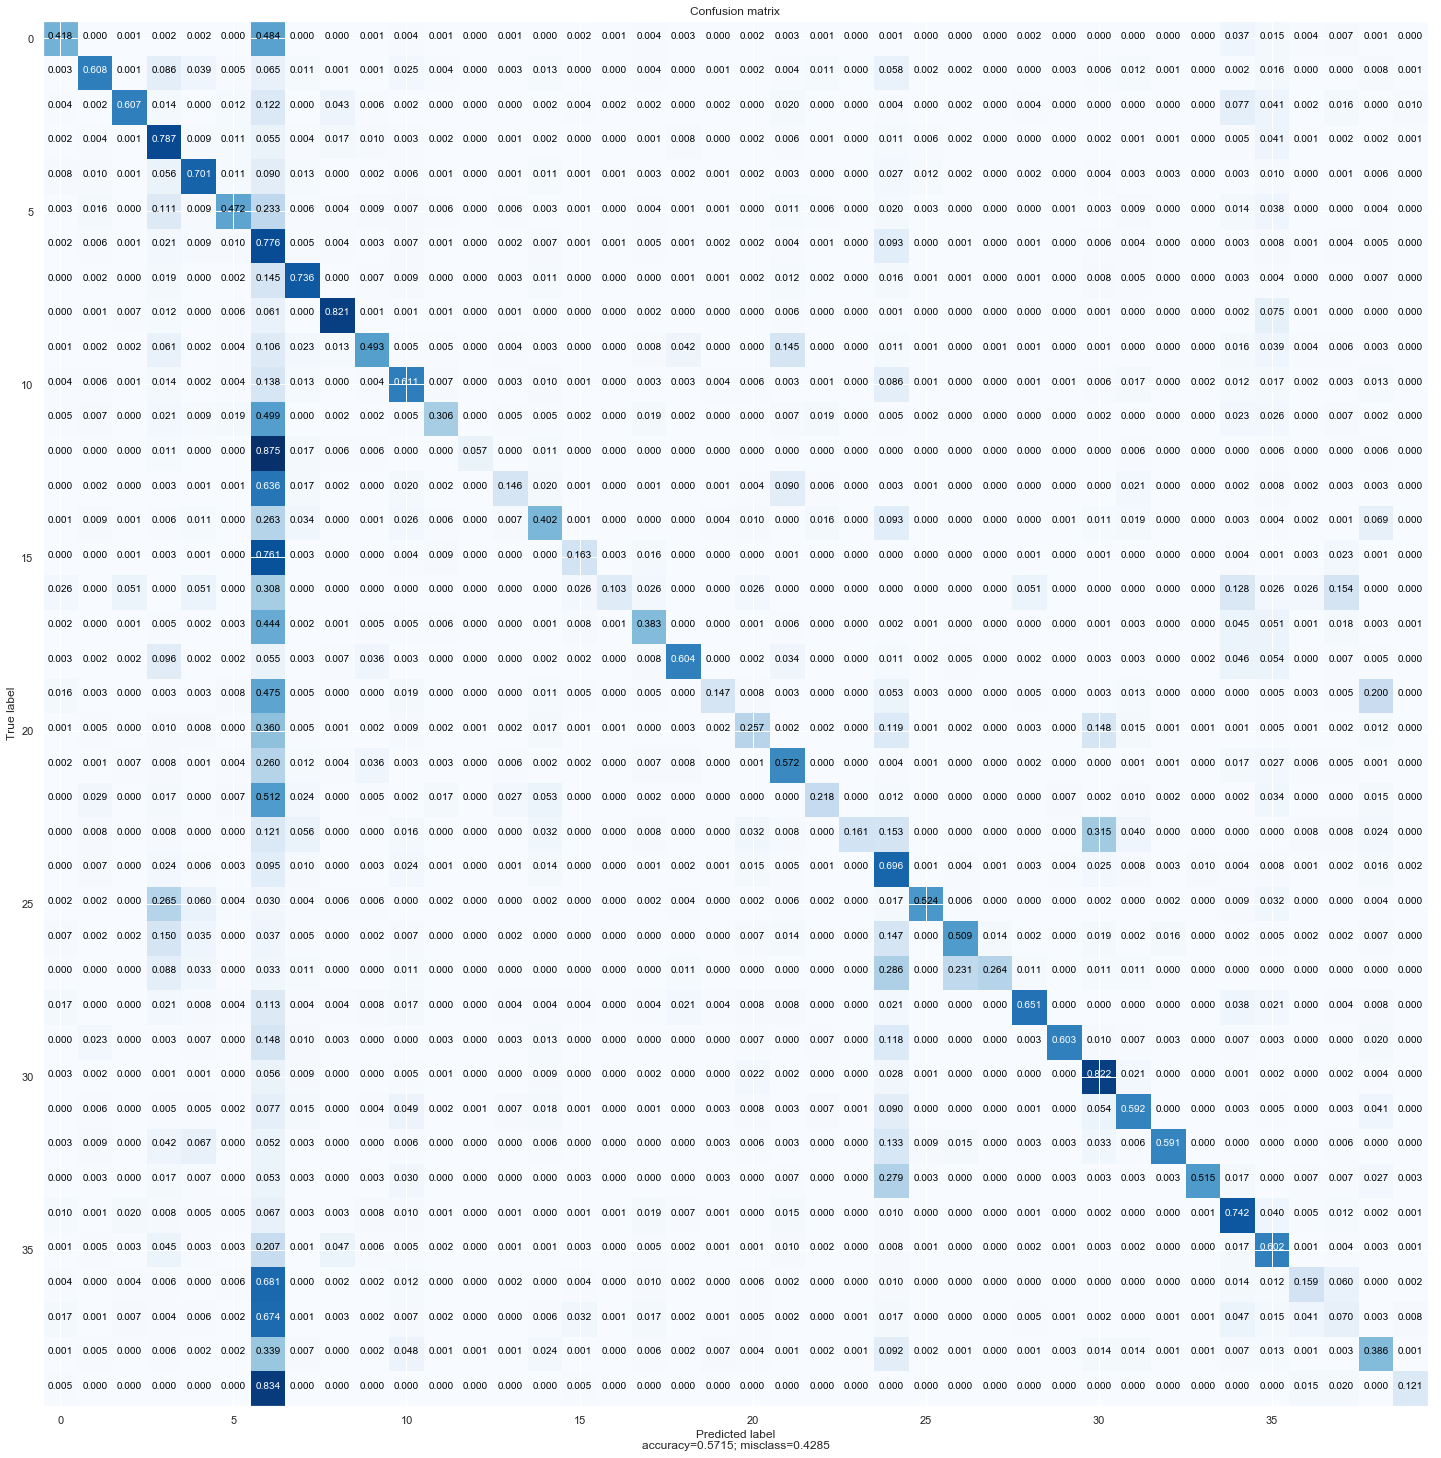

In [172]:
plot_confusion_matrix(cm=metrics.confusion_matrix(yt1, yp1), figsize=(20,20), cmap='Blues')